In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

In [2]:
data = pd.read_excel("../data/050621.xlsx", 'Data')
data

,KV,Khu vực,Số người,Thu nhập,Chi tiêu,Chi ăn uống,thunhap,chitieu,songuoi
0,1,Thành thị,3,130.8,160.1,147.1,130.8,160.1,3.0
1,1,Thành thị,5,343.0,301.0,258.1,343.0,301.0,5.0
2,1,Thành thị,5,112.6,316.3,248.5,112.6,316.3,5.0
3,1,Thành thị,3,148.0,137.3,91.8,148.0,137.3,3.0
4,1,Thành thị,4,193.9,176.9,109.8,193.9,176.9,4.0
...,...,...,...,...,...,...,...,...,...
415,2,Nông thôn,3,67.0,43.8,34.6,67.0,43.8,NaN
416,2,Nông thôn,4,24.4,57.2,47.7,24.4,57.2,NaN
417,2,Nông thôn,4,89.9,77.0,62.1,89.9,77.0,NaN
418,2,Nông thôn,2,11.4,20.6,13.4,11.4,20.6,NaN


In [3]:
data.drop(columns=["Khu vực","thunhap", "chitieu", "songuoi"], inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   KV           420 non-null    int64  
 1   Số người     420 non-null    int64  
 2   Thu nhập     420 non-null    float64
 3   Chi tiêu     420 non-null    float64
 4   Chi ăn uống  420 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 16.5 KB


In [5]:
data.shape

(420, 5)

In [6]:
data.dtypes

KV               int64
Số người         int64
Thu nhập       float64
Chi tiêu       float64
Chi ăn uống    float64
dtype: object

In [7]:
data.describe()

,KV,Số người,Thu nhập,Chi tiêu,Chi ăn uống
count,420.000000,420.000000,420.000000,420.000000,420.000000
mean,1.564286,3.904762,142.034524,103.881905,75.329762
std,0.496441,1.518533,110.477344,79.139046,52.249685
min,1.000000,1.000000,5.500000,4.200000,3.500000
25%,1.000000,3.000000,66.425000,51.075000,37.575000
50%,2.000000,4.000000,111.100000,81.500000,59.500000
75%,2.000000,5.000000,185.775000,132.175000,99.325000
max,2.000000,9.000000,782.500000,571.200000,296.400000


array([[<AxesSubplot:title={'center':'KV'}>,
        <AxesSubplot:title={'center':'Số người'}>],
       [<AxesSubplot:title={'center':'Thu nhập'}>,
        <AxesSubplot:title={'center':'Chi tiêu'}>],
       [<AxesSubplot:title={'center':'Chi ăn uống'}>, <AxesSubplot:>]],
      dtype=object)

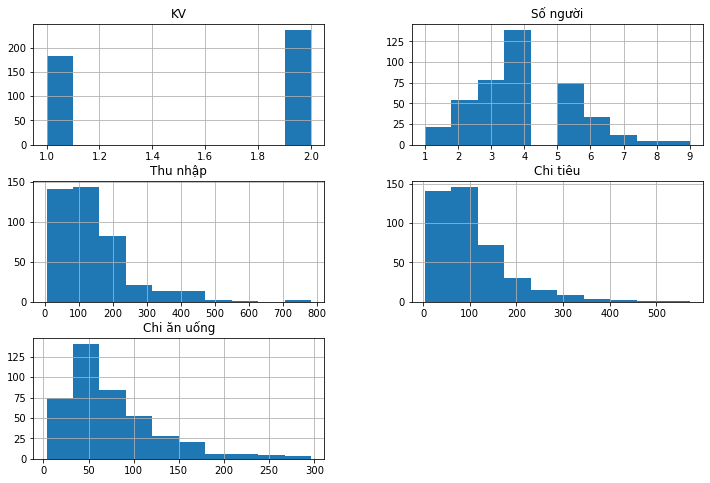

In [8]:
data.hist(figsize=(12,8))

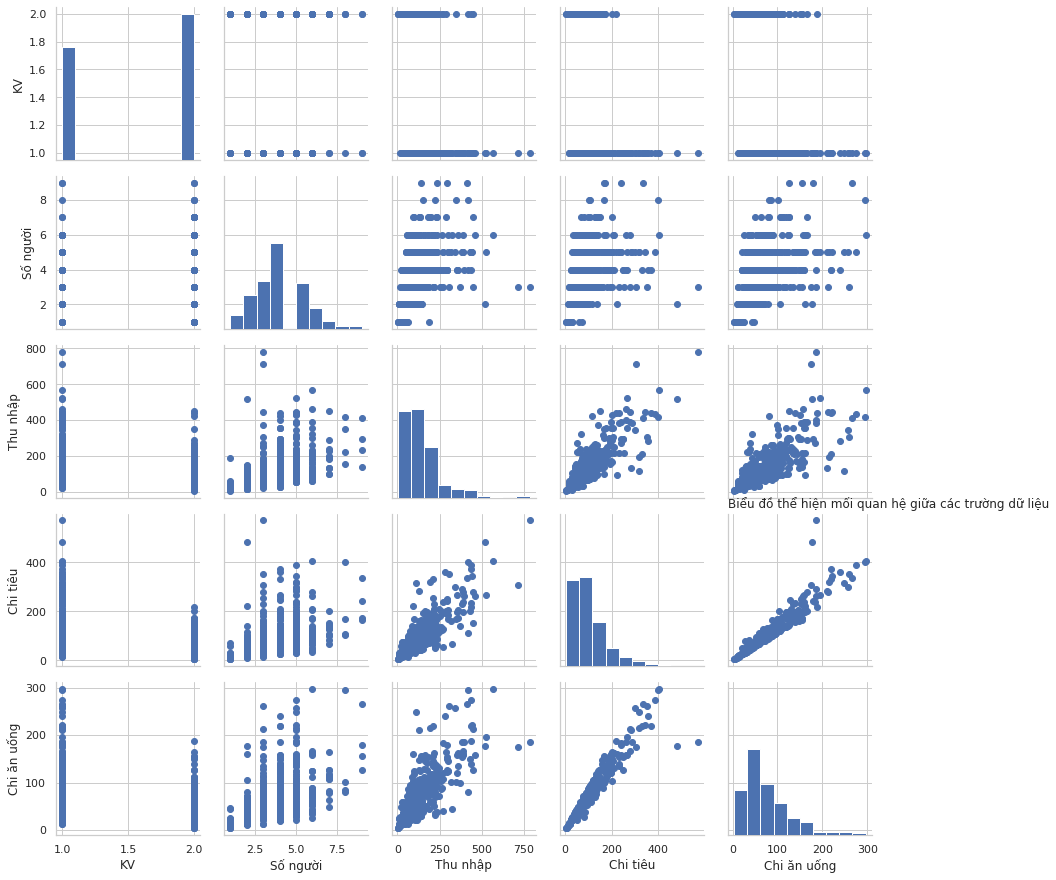

In [16]:
g = sns.PairGrid(data)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.title("Biểu đồ thể hiện mối quan hệ giữa các trường dữ liệu", loc='left')
plt.show()

In [10]:
corr = data._get_numeric_data().corr()

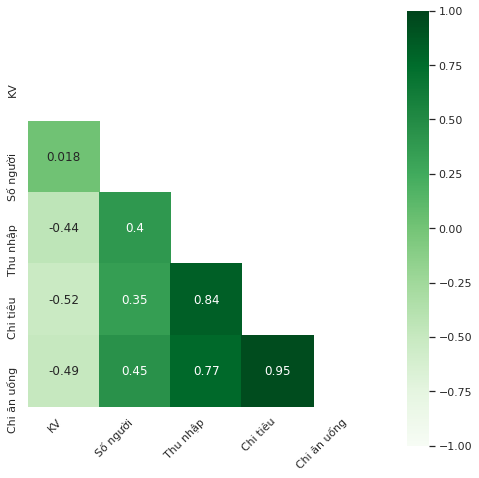

In [11]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(8, 8))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(
    corr, 
    annot=True,
    vmin=-1, vmax=1, center=0,
    cmap = 'Greens',
#     cmap=sns.diverging_palette(20, 20, n=240),
    mask = mask,
    square=True,
    
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [12]:
def corr(x,y):
    slope, intercept, r,p, stderr = scipy.stats.linregress(x, y)
    line = f'Regression line: y={intercept:.2f}+{slope:.2f}x,r={r:.2f}'
    print(scipy.stats.kendalltau(x, y))
    fig, ax=plt.subplots(figsize=(8, 6))
    ax.plot(x,y,linewidth=0, marker='s', label='Data points')
    ax.plot(x, intercept + slope * x,label=line)
    ax.set_xlabel(x.name)
    ax.set_ylabel(y.name)
    ax.legend(facecolor='white')
    plt.show()

KendalltauResult(correlation=0.6573967268533139, pvalue=5.235583820213193e-90)


<Figure size 720x360 with 0 Axes>

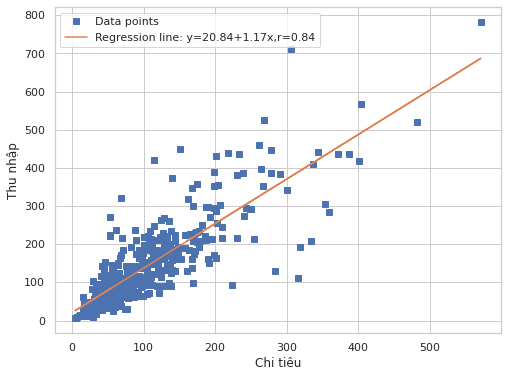

In [13]:
plt.figure(figsize=(10, 5))
# sns.scatterplot(data= data, hue="KV", x="Chi tiêu",  y="Thu nhập")
corr(data["Chi tiêu"], data["Thu nhập"])

KendalltauResult(correlation=0.6180987240533841, pvalue=8.989706872695411e-80)


<Figure size 720x360 with 0 Axes>

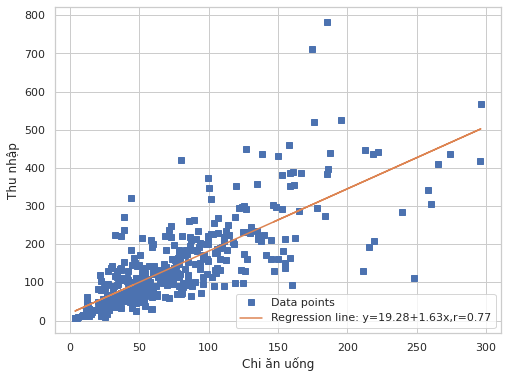

In [14]:
plt.figure(figsize=(10, 5))
# sns.scatterplot(data= data, hue="KV", x="Chi ăn uống",  y="Thu nhập")
corr(data["Chi ăn uống"], data["Thu nhập"])

KendalltauResult(correlation=0.8928413079116808, pvalue=2.7467514950347993e-164)


<Figure size 720x360 with 0 Axes>

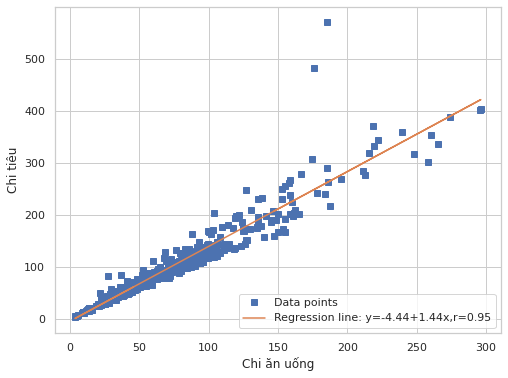

In [15]:
plt.figure(figsize=(10, 5))
# sns.scatterplot(data= data, hue="KV", x="Chi ăn uống",  y="Thu nhập")
corr(data["Chi ăn uống"], data["Chi tiêu"])

$\rightarrow$ Các cặp thuộc tính đồng biến với nhau: Chi ăn uống - Chi tiêu, Chi ăn uống- Thu nhập, Chi tiêu-Thu nhập 

In [20]:
data["KV"].value_counts()

2    237
1    183
Name: KV, dtype: int64

In [26]:
results =sm.OLS(data["Thu nhập"], data["Chi tiêu"]).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               Thu nhập   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                              3118.
Date:                Fri, 07 May 2021   Prob (F-statistic):                   3.33e-196
Time:                        16:18:30   Log-Likelihood:                         -2328.7
No. Observations:                 420   AIC:                                      4659.
Df Residuals:                     419   BIC:                                      4663.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [27]:
results =sm.OLS(data["Chi ăn uống"], data["Thu nhập"]).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            Chi ăn uống   R-squared (uncentered):                   0.843
Model:                            OLS   Adj. R-squared (uncentered):              0.843
Method:                 Least Squares   F-statistic:                              2258.
Date:                Fri, 07 May 2021   Prob (F-statistic):                   8.03e-171
Time:                        16:22:24   Log-Likelihood:                         -2104.0
No. Observations:                 420   AIC:                                      4210.
Df Residuals:                     419   BIC:                                      4214.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------